### Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [95]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [96]:
#import the dataset
data= pd.read_html(r'https://github.com/dsrscientist/DSData/blob/master/Advertising.csv')
data=data[0]
data

,Unnamed: 0,Unnamed: 1,TV,radio,newspaper,sales
0,NaN,1,230.1,37.8,69.2,22.1
1,NaN,2,44.5,39.3,45.1,10.4
2,NaN,3,17.2,45.9,69.3,9.3
3,NaN,4,151.5,41.3,58.5,18.5
4,NaN,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,NaN,196,38.2,3.7,13.8,7.6
196,NaN,197,94.2,4.9,8.1,9.7
197,NaN,198,177.0,9.3,6.4,12.8
198,NaN,199,283.6,42.0,66.2,25.5


In the dataset there are unrelated varibales,
 - Unnamed: 0 has null values
 - Unnamed: 1 is the observation index which we don't need

In [97]:
#dropping those columns
data.drop(columns=['Unnamed: 0','Unnamed: 1'],inplace=True)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


The columns has been droped. Lets check the datatypes of the variables

In [98]:
#datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Columns TV, radio, newspaper and sales are float datatypes. Lets see if it contains any null values.

In [99]:
#null values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Dataset has no null values. now we have to check the data distribution

In [100]:
#Descriptive Statistics
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


We can see that the mean is somewhat near to standard deviation in newspaper, radio

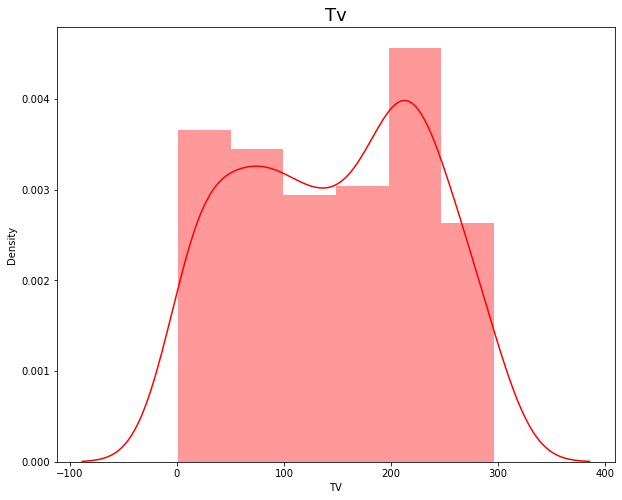

In [101]:
#visualising the distribution of datas in each column
#Tv
plt.figure(figsize=(10,8),facecolor='white')

sns.distplot(data.TV,color='red')
plt.title("Tv",fontsize=18)
plt.show()

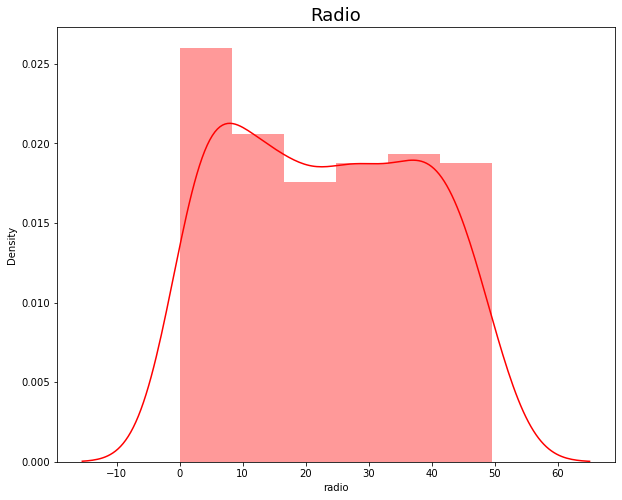

In [102]:
#radio
plt.figure(figsize=(10,8),facecolor='white')

sns.distplot(data.radio,color='red')
plt.title("Radio",fontsize=18)
plt.show()

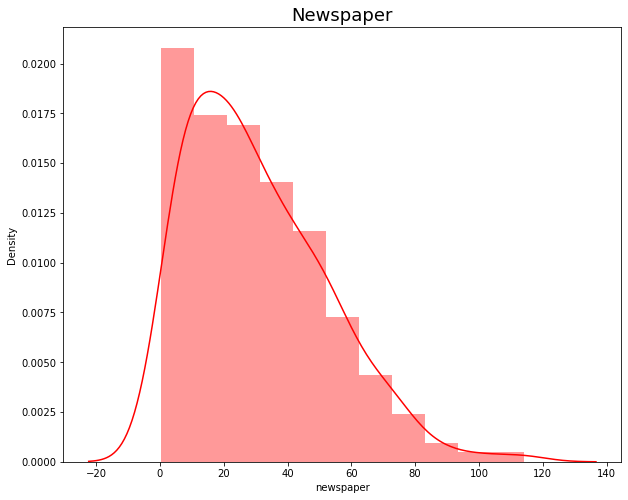

In [103]:
#newspaper
plt.figure(figsize=(10,8),facecolor='white')

sns.distplot(data.newspaper,color='red')
plt.title("Newspaper",fontsize=18)
plt.show()

In [104]:
#skewness
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Since the range of of skewness is +/-0.5 we will transform the column variables using power transform

In [105]:
#splitting the dataset as features and target variables
x= data.drop(columns='sales')
y= data.sales

In [106]:
#Power transform
from sklearn.preprocessing import power_transform
x= pd.DataFrame(power_transform(x),columns=x.columns)
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


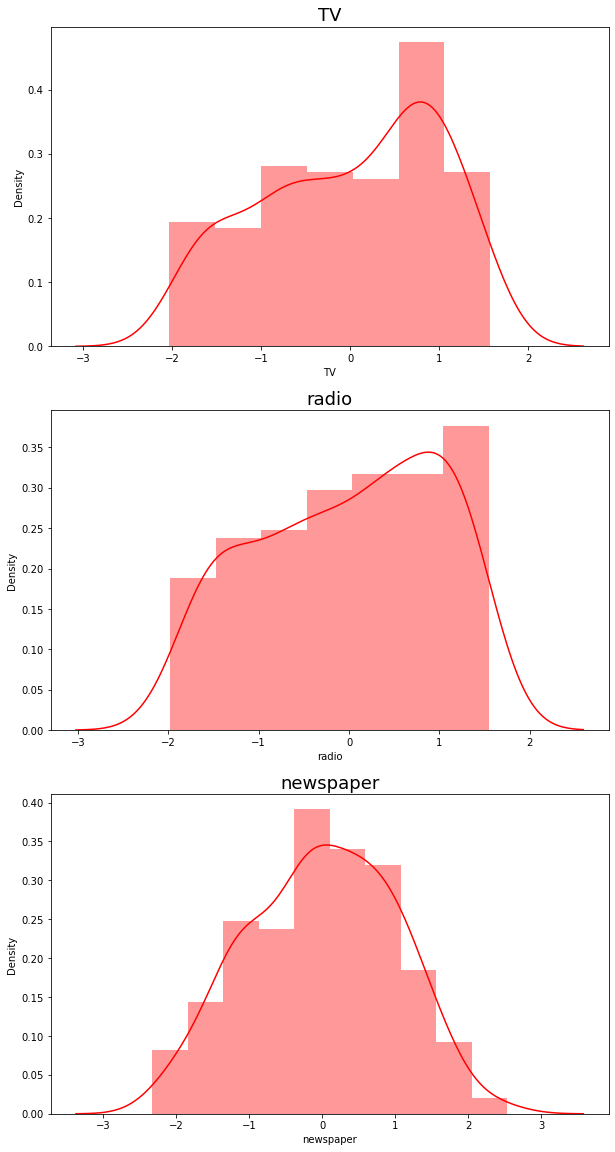

In [107]:
#visualize the distribution
plt.figure(figsize=(10,20),facecolor='white')
pltno=1
for column in x.columns:
    plt.subplot(3,1,pltno)
    sns.distplot(x[column],color='red')
    plt.title(column,fontsize=18)
    pltno+=1

plt.show()

In [108]:
#checking the skewness of the features
x.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

Our datasets skewness has been reduced. lets check is there any outliers in the dataset.

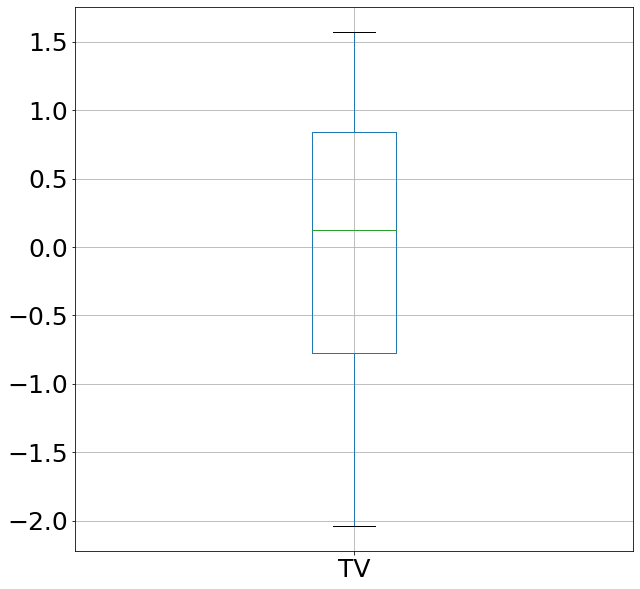

In [109]:
#visualising outliers
#Tv
plt.figure(figsize=(10,10),facecolor='white')

x.boxplot(column='TV',fontsize=25)
plt.show()

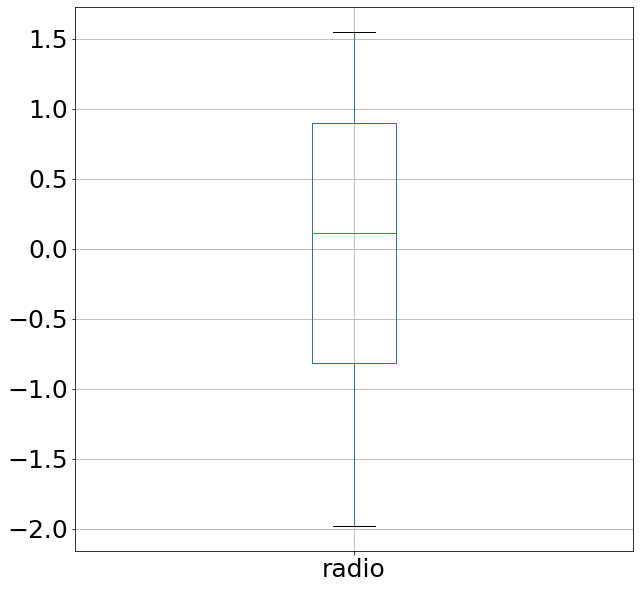

In [110]:
#radio
plt.figure(figsize=(10,10),facecolor='white')

x.boxplot(column='radio',fontsize=25)
plt.show()

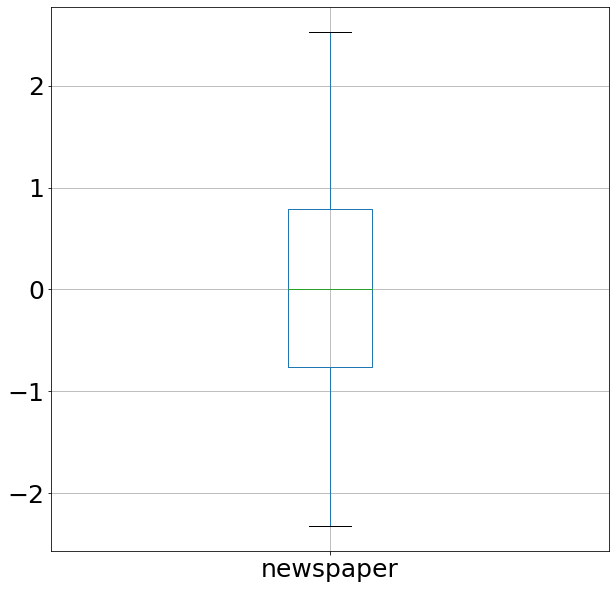

In [111]:
#newspaper
plt.figure(figsize=(10,10),facecolor='white')

x.boxplot(column='newspaper',fontsize=25)
plt.show()

Lets see if there any outliers and neglect them using zscore.

In [112]:
#zscore
from scipy.stats import zscore
np.where(np.abs(zscore(x))>3)

(array([], dtype=int64), array([], dtype=int64))

As you can see there is no outliers in the dataset.

In [113]:
#Model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [114]:
#standardising all the features
scalar= StandardScaler()
x=scalar.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [143]:
#selecting the best random state with best score
max_score=0
trainscore=0
maxrs=0
for i in range(0,100):
    lr= LinearRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= r2_score(y_test,test_pred)
    trainscore= r2_score(y_train,train_pred)
    if round(score,2)==round(trainscore,2):
        print(f'At random state {i} the training score is {trainscore} and test score {score}')
    

At random state 5 the training score is 0.9057996837685972 and test score 0.9111155103873197
At random state 21 the training score is 0.9055624003652625 and test score 0.9082319224948717
At random state 23 the training score is 0.9051980620752518 and test score 0.912255042790337
At random state 27 the training score is 0.9061121337699268 and test score 0.9124326285551334
At random state 28 the training score is 0.9072975185732034 and test score 0.9055189371310904
At random state 45 the training score is 0.9057903571407298 and test score 0.9087110254753442
At random state 86 the training score is 0.90712913594853 and test score 0.9077013021276181


In [147]:
#splitting the dataset with the choosen best random state
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=86)

In [144]:
#best cross fold value
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.9042245206305917
At cross fold 3 cross value score is 0.9005133366024934
At cross fold 4 cross value score is 0.9010704953541405
At cross fold 5 cross value score is 0.8978060430607069
At cross fold 6 cross value score is 0.9020141622653224
At cross fold 7 cross value score is 0.8982025458270028
At cross fold 8 cross value score is 0.8958223041714928
At cross fold 9 cross value score is 0.895873178203007


In [177]:
#LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
y_lrpred=lr.predict(x_test)

#cross valuation
cvs= cross_val_score(lr,x,y,cv=6)
cvs_mean= cvs.mean()

print('r2 score for LinearRegression:',r2_score(y_test,y_lrpred))
print('cross valuation mean for cross fold 6 is',cvs_mean)
print('Mean squared error for LinearRegression:',mean_squared_error(y_test,y_lrpred))

r2 score for LinearRegression: 0.9077013021276181
cross valuation mean for cross fold 6 is 0.9020141622653224
Mean squared error for LinearRegression: 2.2849921370107595


Our model gives a score of 90% and cross value also gives 90 thus telling our model is not biased or overfitted.

In [183]:
#lasso model for reglularization
from sklearn.linear_model import Lasso,LassoCV
lassocv= LassoCV()
lassocv.fit(x_train,y_train)
print('alpha value:',lassocv.alpha_)
ls= Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
y_lspred= ls.predict(x_test)

#cross valuation
cvs= cross_val_score(lassocv,x,y,cv=6)
cvs_mean= cvs.mean()

print('r2 score for Lasso:',r2_score(y_test,y_lspred))
print('cross valuation mean for cross fold 6 is',cvs_mean)
print('Mean squared error for Lasso:',mean_squared_error(y_test,y_lspred))

alpha value: 0.0474657716715037
r2 score for Lasso: 0.9093208142223446
cross valuation mean for cross fold 6 is 0.9020141622653224
Mean squared error for Lasso: 2.244898695959615


In [157]:
#gradientBoostingregressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
param={'n_estimators':[100,500,1000],
       'learning_rate':[.001,0.01,.1],
       'max_depth':[1,2,4],
       'subsample':[.5,.75,1]}

search= GridSearchCV(gbr,param_grid=param)
search.fit(x_train,y_train)
print(f'Best parameters is {search.best_params_}')

Best parameters is {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [168]:
gbr= search.best_estimator_
gbr.fit(x_train,y_train)
print(f'our model fits {(gbr.score(x_train,y_train))*100}% of the dataset')
y_gbrpred=gbr.predict(x_test)
print(f'our r2 score is {(r2_score(y_test,y_gbrpred)*100)}%')

our model fits 99.96595410914654% of the dataset
our r2 score is 99.025665845083%


In [169]:
#corss validation of the Randomforest regressor
cvs= cross_val_score(gbr,x,y,cv=6)
cv_mean= cvs.mean()
cv_mean

0.986815489645409

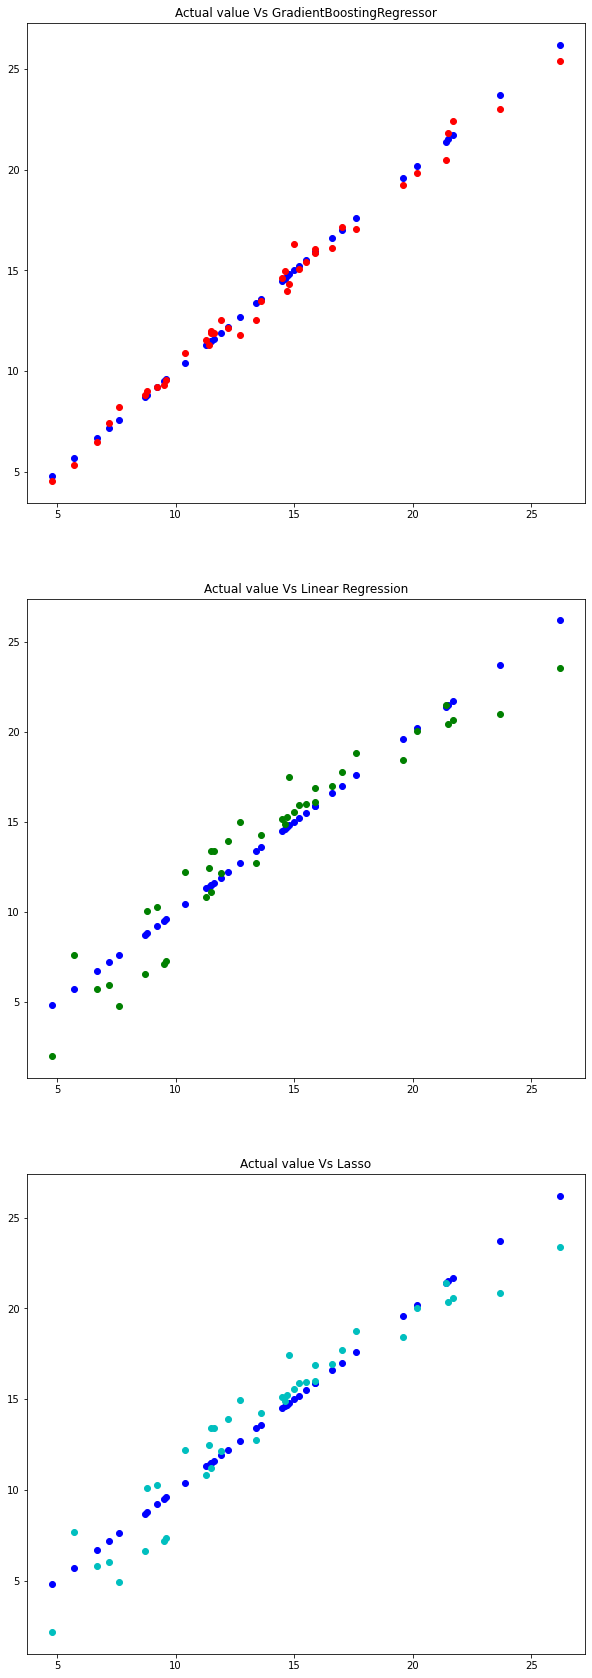

In [189]:
plt.figure(figsize=(10,30),facecolor='white')

plt.subplot(3,1,1)
plt.scatter(y_test,y_test,color='b',label='Actual value')
plt.scatter(y_test,y_gbrpred,color='r',label='GradientBoostingRegressor')
plt.title('Actual value Vs GradientBoostingRegressor')

plt.subplot(3,1,2)
plt.scatter(y_test,y_test,color='b',label='Actual value')
plt.scatter(y_test,y_lrpred,color='g',label='Linear Regression')
plt.title('Actual value Vs Linear Regression')

plt.subplot(3,1,3)
plt.scatter(y_test,y_test,color='b',label='Actual value')
plt.scatter(y_test,y_lspred,color='c',label='Lasso')
plt.title('Actual value Vs Lasso')

plt.show()

**Our GradientBoostingregressor model gives a R2 score of 99% approx. Our model is ready to deploy.**

In [190]:
#saving our trained model
import pickle
pickle.dump(gbr,open('Ads_pred.pkl','wb'))